In [1]:
import pandas as pd
import numpy as np

In [2]:
customer = pd.read_csv("D:\Alab\PYTHON\CASESTUDY\Pandas\Credit card case study 2\Customer Acqusition.csv")

In [3]:
customer

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [4]:
spend = pd.read_csv("D:\Alab\PYTHON\CASESTUDY\Pandas\Credit card case study 2\spend.csv")

In [5]:
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [6]:
Repayment = pd.read_csv("D:\Alab\PYTHON\CASESTUDY\Pandas\Credit card case study 2\Repayment.csv")

In [7]:
Repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


### 1. In the above dataset, (a). In case age is less than 18, replace it with mean of age values.
 

In [8]:
customer.loc[customer['Age']<18,'Age'] = customer.Age.mean()

In [9]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)


In [10]:
cust_spend = pd.merge(customer , spend , on = 'Customer' , how = 'left')

In [11]:
cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [12]:
cust_spend.loc[cust_spend['Amount']>cust_spend['Limit'],'Amount'] = cust_spend['Limit']*0.05

In [13]:
cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [14]:
Repayment.rename(columns={'Amount':'Repay_amt'},inplace=True)

In [160]:
cust_spend_repay = pd.merge(cust_spend,Repayment, on='Customer', how = 'left')

In [161]:
cust_spend_repay.loc[cust_spend_repay['Repay_amt']>cust_spend_repay['Limit'],'Repay_amt'] = cust_spend_repay['Limit']

In [162]:
cust_spend_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount,M,Year,months,SL No:,Month_y,Repay_amt,Unnamed: 4
0,1,A1,76.000000,BANGALORE,Gold,500000.000000,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.800000,Jan,2004,Jan,NaN,12-Jan-04,495414.750000,NaN
1,1,A1,76.000000,BANGALORE,Gold,500000.000000,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.800000,Jan,2004,Jan,2.000000,3-Jan-04,245899.020000,NaN
2,1,A1,76.000000,BANGALORE,Gold,500000.000000,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.800000,Jan,2004,Jan,3.000000,15-Jan-04,259490.060000,NaN
3,1,A1,76.000000,BANGALORE,Gold,500000.000000,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.800000,Jan,2004,Jan,4.000000,25-Jan-04,437555.120000,NaN
4,1,A1,76.000000,BANGALORE,Gold,500000.000000,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.800000,Jan,2004,Jan,5.000000,17-Jan-05,165972.880000,NaN


### 2. (a)  How many distinct customers exist?

In [70]:
cust_spend_repay.Customer.nunique()

100

### (b). How many distinct categories exist?

In [74]:
cust_spend_repay.Product.nunique()

3

### (c). What is the average monthly spend by customers?

In [18]:
cust_spend['M'] = cust_spend['Month'].apply(lambda x: x.split('-')[1])

In [19]:
cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,M
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,Jan
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,Jan
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,Jan
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,Jan
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,Jan


In [20]:
avg_spend=cust_spend.groupby(['Customer','M'], as_index=False)['Amount'].mean().sort_values(by='Amount', ascending=False , ignore_index = True)

In [21]:
avg_spend

,Customer,M,Amount
0,A55,Jun,496185.130
1,A30,Jul,485901.185
2,A11,Apr,483603.210
3,A12,Sep,479627.870
4,A80,Mar,474797.300
...,...,...,...
573,A69,Mar,500.000
574,A69,Jan,500.000
575,A47,Jul,500.000
576,A47,Mar,500.000


In [23]:
avg_spend.rename(columns= {'M':'months','Amount':'Avg_spend'})

,Customer,months,Avg_spend
0,A55,Jun,496185.130
1,A30,Jul,485901.185
2,A11,Apr,483603.210
3,A12,Sep,479627.870
4,A80,Mar,474797.300
...,...,...,...
573,A69,Mar,500.000
574,A69,Jan,500.000
575,A47,Jul,500.000
576,A47,Mar,500.000


In [24]:
avg_spend2=cust_spend.groupby(['M'], as_index=False)['Amount'].mean().sort_values(by='Amount', ascending=False , ignore_index = True)

In [25]:
avg_spend2

,M,Amount
0,Jun,172716.190357
1,Aug,158688.017619
2,Jul,151862.232143
3,Feb,141013.454202
4,May,139238.021476
5,Nov,137517.511429
6,Jan,134656.751318
7,Sep,130845.765238
8,Oct,123624.756071
9,Apr,121985.705333


### (d). What is the average monthly repayment by customers?

In [26]:
cust_spend_repay['months'] = cust_spend['Month'].apply(lambda x: x.split('-')[1])

In [27]:
cust_spend_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount,SL No:,Month_y,Repay_amt,Unnamed: 4,months
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,NaN,12-Jan-04,495414.75,NaN,Jan
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2.0,3-Jan-04,245899.02,NaN,Jan
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,3.0,15-Jan-04,259490.06,NaN,Jan
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,4.0,25-Jan-04,437555.12,NaN,Jan
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,5.0,17-Jan-05,165972.88,NaN,Jan


In [28]:
avg_repay =cust_spend_repay.groupby(['Customer','months'], as_index=False)['Repay_amt'].mean().sort_values(by='Repay_amt', ascending=False , ignore_index = True)

In [29]:
avg_repay.head()

,Customer,months,Repay_amt
0,A1,Nov,342567.951667
1,A1,Oct,330397.494000
2,A1,Dec,328613.532500
3,A1,Aug,300802.636364
4,A1,Sep,295324.461111


### (e). If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [30]:
cust_spend_repay['M_profit']=cust_spend_repay['Repay_amt']-cust_spend_repay['Amount']

In [31]:
cust_spend_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount,SL No:,Month_y,Repay_amt,Unnamed: 4,months,M_profit
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,NaN,12-Jan-04,495414.75,NaN,Jan,9943.95
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2.0,3-Jan-04,245899.02,NaN,Jan,-239571.78
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,3.0,15-Jan-04,259490.06,NaN,Jan,-225980.74
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,4.0,25-Jan-04,437555.12,NaN,Jan,-47915.68
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,5.0,17-Jan-05,165972.88,NaN,Jan,-319497.92


In [32]:
df = cust_spend_repay[cust_spend_repay['M_profit']>0]

In [33]:
df

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount,SL No:,Month_y,Repay_amt,Unnamed: 4,months,M_profit
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,NaN,12-Jan-04,495414.75,NaN,Jan,9943.95
18,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,NaN,12-Jan-04,495414.75,NaN,Jan,84858.62
21,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,4.0,25-Jan-04,437555.12,NaN,Nov,26998.99
33,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,215.0,1-Apr-06,429099.97,NaN,Oct,18543.84
34,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,229.0,15-Jan-04,453027.64,NaN,Dec,42471.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,98.0,25-Jan-04,100000.00,NaN,NaN,45270.34
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,500.00,99.0,12-Jan-04,10000.00,NaN,NaN,9500.00
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,500.05,100.0,3-Jan-04,10001.00,NaN,NaN,9500.95
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,500.10,101.0,15-Jan-04,10002.00,NaN,NaN,9501.90


In [ ]:
df['Profit']=df['M_profit']*0.029

In [35]:
df.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount,SL No:,Month_y,Repay_amt,Unnamed: 4,months,M_profit,Profit
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,NaN,12-Jan-04,495414.75,NaN,Jan,9943.95,288.37455
18,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,NaN,12-Jan-04,495414.75,NaN,Jan,84858.62,2460.89998
21,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,4.0,25-Jan-04,437555.12,NaN,Nov,26998.99,782.97071
33,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,215.0,1-Apr-06,429099.97,NaN,Oct,18543.84,537.77136
34,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,229.0,15-Jan-04,453027.64,NaN,Dec,42471.51,1231.67379


###  f. What are the top 5 product types

In [91]:
df.groupby(['Type'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False , ignore_index=True)[0:5]

,Type,Amount
0,CAMERA,262263753.460000
1,PETRO,239242854.400000
2,AIR TICKET,198073759.390000
3,FOOD,189184666.120000
4,TRAIN TICKET,185627276.910000


### g. Which city is having maximum spend?

In [33]:
df_city=df.groupby(['City'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False , ignore_index=True)

In [412]:
df_city

,City,Amount
0,COCHIN,423590044.530000
1,BANGALORE,407163827.270000
2,CALCUTTA,362679448.050000
3,BOMBAY,255198483.290000
4,CHENNAI,167452769.680000
5,TRIVANDRUM,166881742.250000
6,DELHI,101895525.190000
7,PATNA,101649528.310000


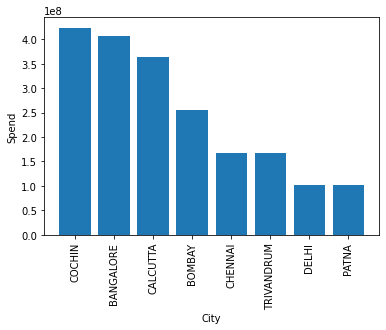

In [35]:
import matplotlib.pyplot as plt

plt.bar(df_city['City'],df_city['Amount'])
plt.xticks(df_city['City'] , rotation='vertical')
plt.xlabel('City')
plt.ylabel('Spend')
plt.show()

In [36]:
#Cochin is having maximum spend

### h. Which age group is spending more money?


In [ ]:
df["Age_group"] = pd.cut(x=df['Age'], bins=[0,30,60,100], labels=["young","middle_aged","old"])

In [38]:
df

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount,SL No:,Month_y,Repay_amt,Unnamed: 4,months,M_profit,Profit,Age_group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,NaN,12-Jan-04,495414.75,NaN,Jan,9943.95,288.37455,old
18,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,NaN,12-Jan-04,495414.75,NaN,Jan,84858.62,2460.89998,old
21,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,4.0,25-Jan-04,437555.12,NaN,Nov,26998.99,782.97071,old
33,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,215.0,1-Apr-06,429099.97,NaN,Oct,18543.84,537.77136,old
34,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,229.0,15-Jan-04,453027.64,NaN,Dec,42471.51,1231.67379,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,98.0,25-Jan-04,100000.00,NaN,NaN,45270.34,1312.83986,middle_aged
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,500.00,99.0,12-Jan-04,10000.00,NaN,NaN,9500.00,275.50000,middle_aged
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,500.05,100.0,3-Jan-04,10001.00,NaN,NaN,9500.95,275.52755,middle_aged
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,500.10,101.0,15-Jan-04,10002.00,NaN,NaN,9501.90,275.55510,middle_aged


In [39]:
df_age=df.groupby(['Age_group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False , ignore_index=True)

In [40]:
pd.set_option('float_format', '{:f}'.format)

In [41]:
df_age

,Age_group,Amount
0,middle_aged,1016700558.080000
1,young,605006047.810000
2,old,364804762.680000


In [42]:
# Middle-aged(30-60) spend more money

### i. Who are the top 10 customers in terms of repayment?

In [42]:
df.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount,SL No:,Month_y,Repay_amt,Unnamed: 4,months,M_profit,Profit,Age_group
0,1,A1,76.000000,BANGALORE,Gold,500000.000000,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.800000,NaN,12-Jan-04,495414.750000,NaN,Jan,9943.950000,288.374550,old
18,1,A1,76.000000,BANGALORE,Gold,500000.000000,C1,Self Employed,2,3-Jan-04,PETRO,410556.130000,NaN,12-Jan-04,495414.750000,NaN,Jan,84858.620000,2460.899980,old
21,1,A1,76.000000,BANGALORE,Gold,500000.000000,C1,Self Employed,2,3-Jan-04,PETRO,410556.130000,4.000000,25-Jan-04,437555.120000,NaN,Nov,26998.990000,782.970710,old
33,1,A1,76.000000,BANGALORE,Gold,500000.000000,C1,Self Employed,2,3-Jan-04,PETRO,410556.130000,215.000000,1-Apr-06,429099.970000,NaN,Oct,18543.840000,537.771360,old
34,1,A1,76.000000,BANGALORE,Gold,500000.000000,C1,Self Employed,2,3-Jan-04,PETRO,410556.130000,229.000000,15-Jan-04,453027.640000,NaN,Dec,42471.510000,1231.673790,old


In [43]:
df.groupby(['Customer'], as_index=False)['Repay_amt'].sum().sort_values(by='Repay_amt', ascending=False, ignore_index=True)[0:10]

,Customer,Repay_amt
0,A61,294896424.320000
1,A60,240610699.180000
2,A13,213425770.380000
3,A43,204706056.680000
4,A45,198121211.660000
5,A44,182001399.700000
6,A42,171182113.840000
7,A12,170874854.840000
8,A39,157222611.310000
9,A14,156457695.770000


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [44]:
import time
import datetime as dt
import calendar

In [45]:
cust_spend['Month']=pd.to_datetime(cust_spend['Month'])
cust_spend['Year']=cust_spend.Month.dt.year

In [46]:
cust_spend['months']=cust_spend.Month.dt.month

cust_spend['months'] = cust_spend['months'].apply(lambda x: calendar.month_abbr[x])
cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,M,Year,months
0,1,A1,76.000000,BANGALORE,Gold,500000.000000,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.800000,Jan,2004,Jan
1,1,A1,76.000000,BANGALORE,Gold,500000.000000,C1,Self Employed,2,2004-01-03,PETRO,410556.130000,Jan,2004,Jan
2,1,A1,76.000000,BANGALORE,Gold,500000.000000,C1,Self Employed,3,2004-01-15,CLOTHES,23740.460000,Jan,2004,Jan
3,1,A1,76.000000,BANGALORE,Gold,500000.000000,C1,Self Employed,4,2004-01-25,FOOD,484342.470000,Jan,2004,Jan
4,1,A1,76.000000,BANGALORE,Gold,500000.000000,C1,Self Employed,5,2005-01-17,CAMERA,369694.070000,Jan,2005,Jan


In [104]:
graph = cust_spend.groupby(['City','Product','Year'], as_index=False)['Amount'].sum()

In [303]:
graph.to_csv('grph')

In [216]:
graph['Amt(Lakhs)']=graph['Amount']/100000
graph.head()

,City,Product,Year,Amount,Amt(Lakhs)
0,BANGALORE,Gold,2004,9289878.540000,92.898785
1,BANGALORE,Gold,2005,12892362.990000,128.923630
2,BANGALORE,Gold,2006,12030611.090000,120.306111
3,BANGALORE,Platimum,2004,437711.150000,4.377111
4,BANGALORE,Platimum,2005,354266.970000,3.542670


In [218]:
gold = graph[graph.Product == 'Gold']
Platimum = graph[graph.Product == 'Platimum']
Silver = graph[graph.Product == 'Silver']

In [220]:
gold2004 = gold[gold.Year==2004]
gold2005 = gold[gold.Year==2005]
gold2006 = gold[gold.Year==2006]

Platimum2004 = Platimum[Platimum.Year==2004]
Platimum2005 = Platimum[Platimum.Year==2005]
Platimum2006 = Platimum[Platimum.Year==2006]

Silver2004 = Silver[Silver.Year==2004]
Silver2005 = Silver[Silver.Year==2005]
Silver2006 = Silver[Silver.Year==2006]

C:\Users\anshi\AppData\Local\Temp/ipykernel_17300/2454848035.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(gold2004.City, rotation='vertical')
C:\Users\anshi\AppData\Local\Temp/ipykernel_17300/2454848035.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(Platimum2004.City, rotation='vertical')
C:\Users\anshi\AppData\Local\Temp/ipykernel_17300/2454848035.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(Silver2004.City, rotation='vertical')


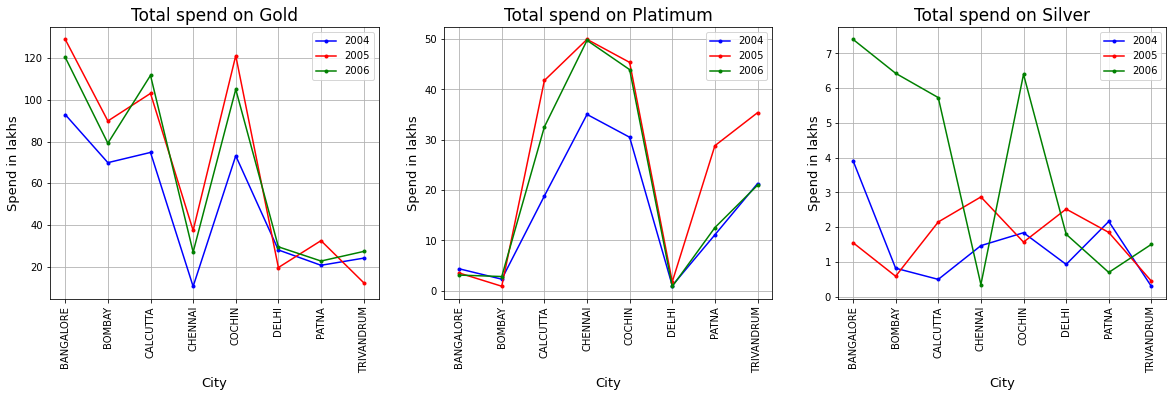

In [313]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.plot(gold2004['City'],gold2004['Amt(Lakhs)'],'b.-')
ax1.plot(gold2005['City'],gold2005['Amt(Lakhs)'], 'r.-')
ax1.plot(gold2006['City'],gold2006['Amt(Lakhs)'], 'g.-')
ax1.set_xticklabels(gold2004.City, rotation='vertical')
ax1.set_xlabel('City',fontsize=13)
ax1.set_ylabel('Spend in lakhs',fontsize=13)
ax1.set_title('Total spend on Gold' , fontsize=17)
ax1.grid()
ax1.legend([2004,2005,2006])

ax2.plot(Platimum2004.City,Platimum2004['Amt(Lakhs)'],'b.-')
ax2.plot(Platimum2005.City,Platimum2005['Amt(Lakhs)'],'r.-')
ax2.plot(Platimum2006.City,Platimum2006['Amt(Lakhs)'],'g.-')
ax2.set_xlabel('City',fontsize=13)
ax2.set_ylabel('Spend in lakhs',fontsize=13)
ax2.set_xticklabels(Platimum2004.City, rotation='vertical')
ax2.set_title('Total spend on Platimum' , fontsize=17)
ax2.grid()
ax2.legend([2004,2005,2006])


ax3.plot(Silver2004.City,Silver2004['Amt(Lakhs)'],'b.-')
ax3.plot(Silver2005.City,Silver2005['Amt(Lakhs)'],'r.-')
ax3.plot(Silver2006.City,Silver2006['Amt(Lakhs)'],'g.-')
ax3.set_xlabel('City',fontsize=13)
ax3.set_ylabel('Spend in lakhs',fontsize=13)
ax3.set_xticklabels(Silver2004.City, rotation='vertical')
ax3.set_title('Total spend on Silver' , fontsize=17)
ax3.grid()
ax3.legend([2004,2005,2006])

plt.show()

### 4. Create graphs for : (a) Monthly comparison of total spends, city wise

In [296]:
graph2 = cust_spend.groupby(['City','months'], as_index=False)['Amount'].sum()

In [328]:
graph2['Amt(in Lakhs)']=graph2['Amount']/100000
graph2.head()

,City,months,Amount,Amt(in Lakhs)
0,BANGALORE,Apr,3969475.080000,39.694751
1,BANGALORE,Aug,600560.150000,6.005602
2,BANGALORE,Dec,372665.890000,3.726659
3,BANGALORE,Feb,6225983.510000,62.259835
4,BANGALORE,Jan,7912271.640000,79.122716


In [329]:
Blr = graph2[graph2.City=='BANGALORE']
Bom = graph2[graph2.City=='BOMBAY']
Clt = graph2[graph2.City=='CALCUTTA']
che = graph2[graph2.City=='CHENNAI']
Coc = graph2[graph2.City=='COCHIN']
Dlh = graph2[graph2.City=='DELHI']
Pat = graph2[graph2.City=='PATNA']
Tvm = graph2[graph2.City=='TRIVANDRUM']

C:\Users\anshi\AppData\Local\Temp/ipykernel_17300/640904237.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(graph2.months, rotation='vertical')
C:\Users\anshi\AppData\Local\Temp/ipykernel_17300/640904237.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(graph2.months, rotation='vertical')


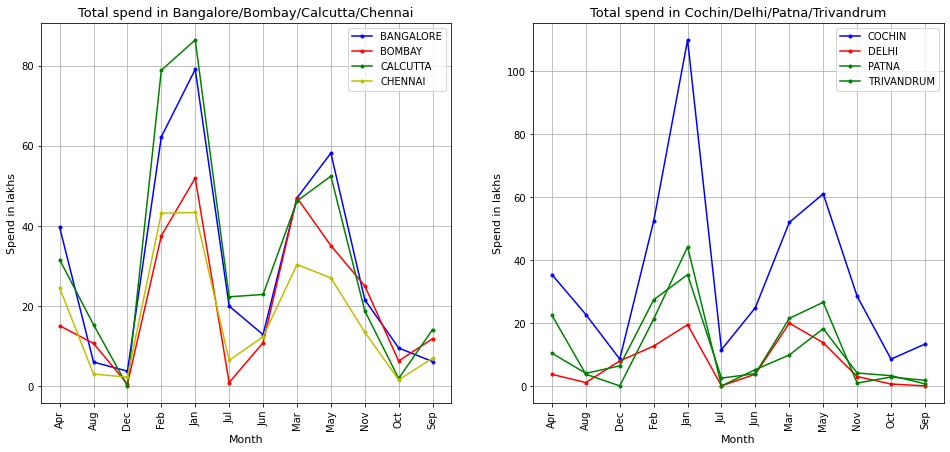

In [335]:
fig = plt.figure(figsize=(25,7))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)

ax1.plot(Blr.months,Blr['Amt(in Lakhs)'],'b.-')
ax1.plot(Bom.months,Bom['Amt(in Lakhs)'], 'r.-')
ax1.plot(Clt.months,Clt['Amt(in Lakhs)'], 'g.-')
ax1.plot(che.months,che['Amt(in Lakhs)'],'y.-')
ax1.set_xticklabels(graph2.months, rotation='vertical')
ax1.set_xlabel('Month',fontsize=11)
ax1.set_ylabel('Spend in lakhs',fontsize=11)
ax1.set_title('Total spend in Bangalore/Bombay/Calcutta/Chennai' , fontsize=13)
ax1.grid()
ax1.legend(['BANGALORE','BOMBAY','CALCUTTA','CHENNAI'])

ax2.plot(Coc.months,Coc['Amt(in Lakhs)'],'b.-')
ax2.plot(Dlh.months,Dlh['Amt(in Lakhs)'],'r.-')
ax2.plot(Pat.months,Pat['Amt(in Lakhs)'],'g.-')
ax2.plot(Tvm.months,Tvm['Amt(in Lakhs)'],'g.-')
ax2.set_xlabel('Month',fontsize=11)
ax2.set_ylabel('Spend in lakhs',fontsize=11)
ax2.set_xticklabels(graph2.months, rotation='vertical')
ax2.set_title('Total spend in Cochin/Delhi/Patna/Trivandrum' , fontsize=13)
ax2.grid()
ax2.legend(['COCHIN','DELHI','PATNA','TRIVANDRUM'])
plt.show()

### b. Comparison of yearly spend on air tickets

In [358]:
air = cust_spend.groupby(['Year','Type'], as_index=False)['Amount'].sum()

In [365]:
air = air[air['Type']=='AIR TICKET']

air['Amt(in Lakhs)']=air['Amount']/100000
air.head()

,Year,Type,Amount,Amt(in Lakhs)
0,2004,AIR TICKET,3709210.950000,37.092109
15,2005,AIR TICKET,10023638.710000,100.236387
30,2006,AIR TICKET,4492456.960000,44.924570


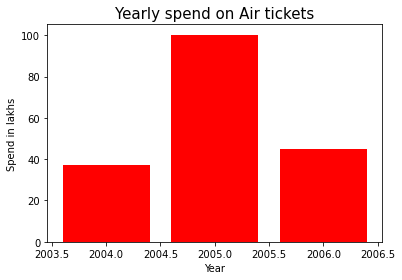

In [413]:
plt.bar(air.Year,air['Amt(in Lakhs)'], color='red')
plt.xlabel('Year')
plt.ylabel('Spend in lakhs')
plt.title('Yearly spend on Air tickets', fontsize=15)
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [397]:
season = cust_spend.groupby(['Product', 'months'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

In [398]:
season['Amt(in Lakhs)']=season['Amount']/100000
season.head()

,Product,months,Amount,Amt(in Lakhs)
4,Gold,Jan,32413831.830000,324.138318
3,Gold,Feb,24779179.550000,247.791796
8,Gold,May,21548169.760000,215.481698
7,Gold,Mar,19256972.480000,192.569725
16,Platimum,Jan,13480028.110000,134.800281


In [399]:
gold2 = season[season.Product == 'Gold']
Platimum2 = season[season.Product == 'Platimum']
Silver2 = season[season.Product == 'Silver']

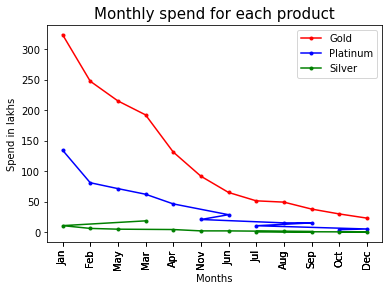

In [400]:
plt.plot(gold2.months,gold2['Amt(in Lakhs)'],'r.-')
plt.plot(Platimum2.months,Platimum2['Amt(in Lakhs)'],'b.-')
plt.plot(Silver2.months,Silver2['Amt(in Lakhs)'],'g.-')
plt.xticks(season.months, rotation='vertical')
plt.xlabel('Months' , fontsize=10)
plt.ylabel('Spend in lakhs' , fontsize=10)
plt.title('Monthly spend for each product' , fontsize=15)
plt.legend(['Gold','Platinum','Silver'])

plt.show()


From the graph its clearly visible that the sale of all the products are more in the beginning of the year  while drastically decline by the year end.

### 5. Write user defined PYTHON function to perform the following analysis: 

#### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers

In [167]:
cust_spend_repay.drop(['No','Segment','Age','Limit','Company','Sl No:','Month_x','Type','Amount','M','SL No:','Month_y','Unnamed: 4','months'], axis=1, inplace=True)

In [171]:
cust_spend_repay.head()

,Customer,City,Product,Repay_amt,year
0,A1,BANGALORE,Gold,495414.750000,2004
1,A1,BANGALORE,Gold,245899.020000,2004
2,A1,BANGALORE,Gold,259490.060000,2004
3,A1,BANGALORE,Gold,437555.120000,2004
4,A1,BANGALORE,Gold,165972.880000,2005


In [185]:
def find(x,y):
    a=cust_spend_repay.groupby(['Customer','City','Product','year'], as_index=False)['Repay_amt'].sum().sort_values(by='Repay_amt', ascending=False, ignore_index=True)    
    b=a.loc[(a.Product==x)&(a.year==y),:][0:10]
    return b

x=input('Enter product name(Gold/Silver/Platimum): ')
y=int(input('Enter Year(2004/2005/2006): '))
z=find(x,y)
z

Enter product name(Gold/Silver/Platimum): Platimum
Enter Year(2004/2005/2006): 2006


,Customer,City,Product,year,Repay_amt
13,A38,CHENNAI,Platimum,2006,96441579.390000
22,A39,TRIVANDRUM,Platimum,2006,79992436.270000
39,A56,CHENNAI,Platimum,2006,62621508.530000
43,A54,COCHIN,Platimum,2006,58602377.520000
44,A40,CALCUTTA,Platimum,2006,58469471.690000
48,A55,PATNA,Platimum,2006,51738928.200000
57,A41,COCHIN,Platimum,2006,38485198.930000
64,A36,BOMBAY,Platimum,2006,34100682.000000
75,A37,BANGALORE,Platimum,2006,27694312.210000
101,A50,COCHIN,Platimum,2006,16200000.000000
